In [1]:
# module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score

In [2]:
#data
train = pd.read_csv('/home/kal/Documents/codeprojects/Unsupervised_Learning/data/pc_train.csv', encoding = 'euc-kr')
test = pd.read_csv('/home/kal/Documents/codeprojects/Unsupervised_Learning/data/pc_test.csv', encoding = 'euc-kr')

In [3]:
train.columns = ['num','date_time','target','temperature','windspeed','humidity','precipitation','sunshine','non_elec_aircon','sunlight']
test.columns = ['num','date_time','temperature','windspeed','humidity','precipitation','sunshine','non_elec_aircon','sunlight']

In [4]:
train.columns

Index(['num', 'date_time', 'target', 'temperature', 'windspeed', 'humidity',
       'precipitation', 'sunshine', 'non_elec_aircon', 'sunlight'],
      dtype='object')

In [5]:
train

,num,date_time,target,temperature,windspeed,humidity,precipitation,sunshine,non_elec_aircon,sunlight
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [6]:
train.date_time = pd.to_datetime(train['date_time'],format='%Y-%m-%d %H')
test.date_time = pd.to_datetime(test['date_time'],format='%Y-%m-%d %H')

In [7]:
train

,num,date_time,target,temperature,windspeed,humidity,precipitation,sunshine,non_elec_aircon,sunlight
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [8]:
#test
train['month'] = pd.to_datetime(train.date_time).dt.month
train['day'] = pd.to_datetime(train.date_time).dt.day
train['weekday'] = pd.to_datetime(train.date_time).dt.weekday
train['hour'] = pd.to_datetime(train.date_time).dt.hour
## test 
test['month'] = pd.to_datetime(test.date_time).dt.month
test['day'] = pd.to_datetime(test.date_time).dt.day
test['weekday'] = pd.to_datetime(test.date_time).dt.weekday
test['hour'] = pd.to_datetime(test.date_time).dt.hour

In [9]:
train

,num,date_time,target,temperature,windspeed,humidity,precipitation,sunshine,non_elec_aircon,sunlight,month,day,weekday,hour
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,1,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,0,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,1,0,2
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,1,0,3
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,8,24,0,19
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,8,24,0,20
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,8,24,0,21
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,8,24,0,22


In [10]:
train1 = train.copy()

In [11]:
train1.columns[2:8]


Index(['target', 'temperature', 'windspeed', 'humidity', 'precipitation',
       'sunshine'],
      dtype='object')

In [12]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
from matplotlib import cm
import matplotlib.pyplot as plt

In [13]:
by_weekday = train1.groupby(['num','weekday'])['target'].median().reset_index().pivot(index='num', columns='weekday', values='target').reset_index()
by_hour = train1.groupby(['num','hour'])['target'].median().reset_index().pivot(index='num',columns='hour',values='target').reset_index().drop('num', axis = 1)
df = pd.concat([by_weekday, by_hour], axis= 1)
columns = ['num'] + ['day'+str(i) for i in range(7)] + ['hour'+str(i) for i in range(24)]
df.columns = columns
df.head()



,num,day0,day1,day2,day3,day4,day5,day6,hour0,hour1,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
0,1,8565.588000,8552.628,8567.208,8574.336,8562.996000,8535.780,8521.524,8546.472,8526.384,...,8600.256,8607.384,8606.088,8598.960,8576.280,8586.000,8573.688,8577.576,8577.576,8558.784
1,2,1261.008000,1304.100,1303.776,1318.356,1300.050000,1074.546,1056.726,1008.288,1001.160,...,1707.480,1697.112,1693.224,1622.268,1367.280,1204.956,1124.604,1078.920,1039.068,1021.248
2,3,3369.363177,3351.834,3381.480,3382.668,3374.500282,3260.736,3250.800,3274.884,3272.400,...,3388.338,3385.152,3406.212,3394.872,3334.176,3295.512,3290.760,3283.524,3283.740,3327.588
3,4,538.488000,547.992,554.256,582.984,612.360000,602.640,608.256,372.816,355.104,...,1294.704,1288.224,1236.384,1121.472,917.568,748.224,566.352,479.520,405.216,422.496
4,5,2761.992000,2732.184,2730.240,2650.752,2880.792000,2747.736,2585.952,2999.808,2920.320,...,2630.880,2667.600,2584.224,2552.256,2344.896,2788.992,3132.000,3111.696,3091.824,3013.200


In [14]:
# standard scaling
for i in range(len(df)):
    # 요일 별 전력 중앙값에 대해 scaling
    df.iloc[i,1:8] = (df.iloc[i,1:8] - df.iloc[i,1:8].mean())/df.iloc[i,1:8].std()
    # 시간대별 전력 중앙값에 대해 scaling
    df.iloc[i,8:] = (df.iloc[i,8:] - df.iloc[i,8:].mean())/df.iloc[i,8:].std()

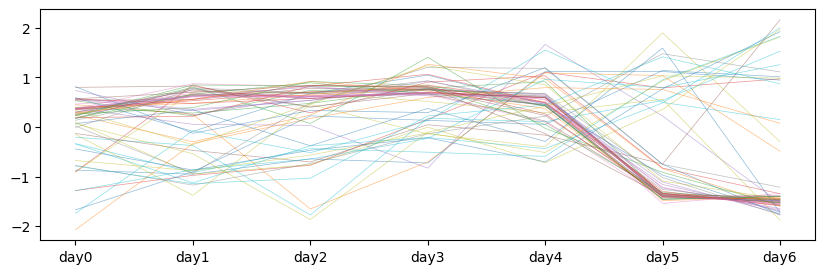

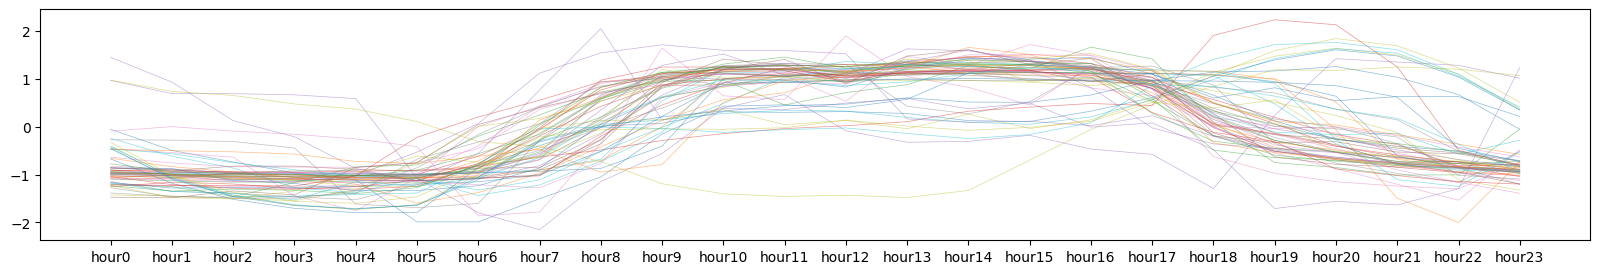

In [15]:
# visualization
fig = plt.figure(figsize = (10,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 1:8], alpha = 0.5, linewidth = 0.5)
fig = plt.figure(figsize = (20,3))
for i in range(len(df)):
    plt.plot(df.iloc[i, 8:], alpha = 0.5, linewidth = 0.5)

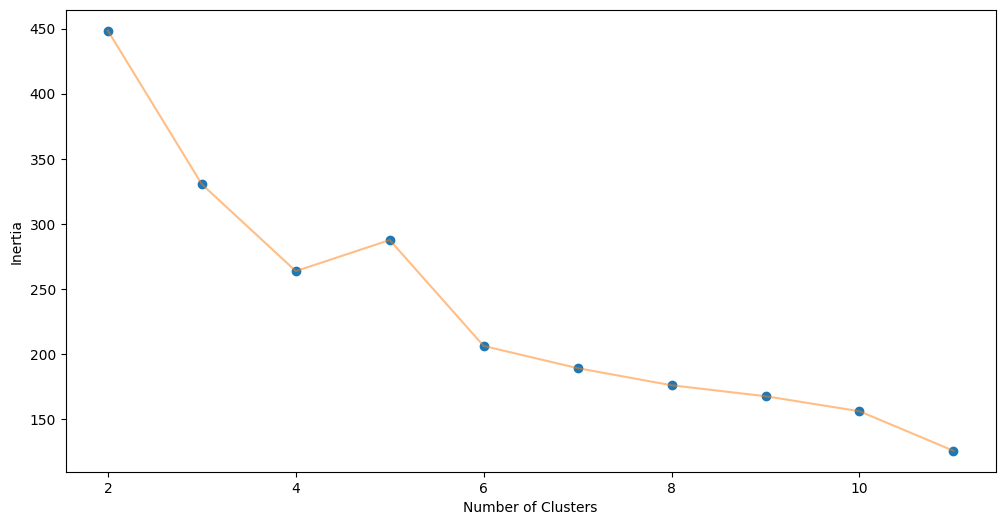

In [16]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance = []
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters=n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        
    plt.figure(1 , figsize = (12, 6))
    plt.plot(n_clusters , sum_of_squared_distance , 'o')
    plt.plot(n_clusters , sum_of_squared_distance , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')

change_n_clusters([2,3,4,5,6,7,8,9,10,11], df.iloc[:,1:])

In [17]:
def Kluster(n_cluster):
    kmeans = KMeans(n_clusters=n_cluster,init='k-means++',random_state = 2)
    km_cluster = kmeans.fit_predict(df.iloc[:,1:])
    df_clust = df.copy()
    df_clust['km_cluster'] = km_cluster
    n_c = len(np.unique(df_clust.km_cluster))
    fig = plt.figure(figsize = (20,8))
    for c in range(n_c):
        temp = df_clust[df_clust.km_cluster == c]
        plt.subplot(n_c,2,2*c+1)
        for i in range(len(temp)):
            plt.plot(temp.iloc[i,1:8], linewidth=0.7, )
            plt.title(f'cluster{c}')
            plt.xlabel('')
            plt.xticks([])
        plt.subplot(n_c,2,2*c+2)
        for i in range(len(temp)):
            plt.plot(temp.iloc[i,8:-6], linewidth=0.7)
            plt.title(f'cluster{c}')
            plt.xlabel('')
            plt.xticks([])

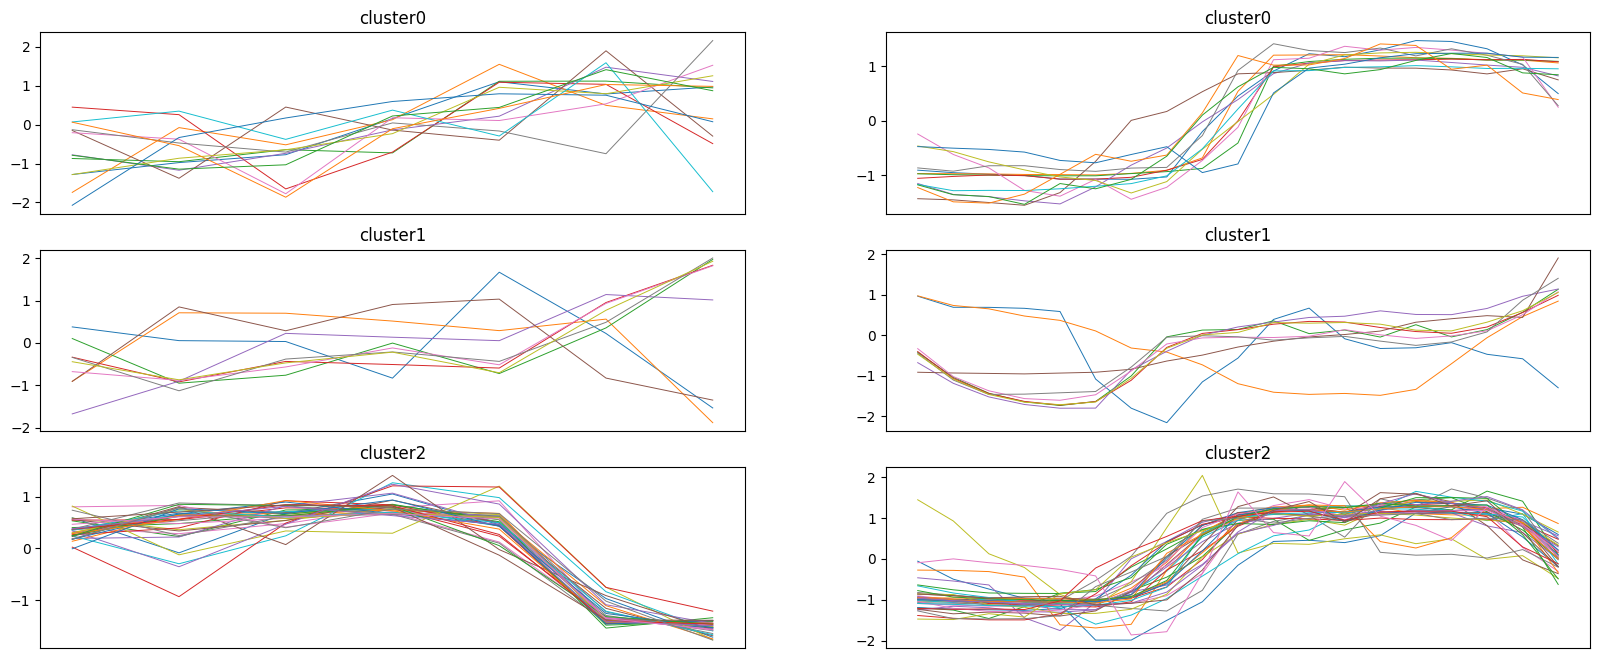

In [18]:
Kluster(3)
